In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\OnlineRetail.csv',encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [8]:
#1. How many columns contain null values
   # 1. 4
   # 2. 5
   # 3. 1
   # 4. None
#Answer)4. None

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(406829, 8)

In [11]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [15]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [124]:
#16. Which country has the lowest amount of people purchasing
#1. Netherlands
#2. Brazil
#3. Japan
#4. Saudi Arabia
#Answer)4. Saudi Arabia

con=df.groupby('Country')['CustomerID'].count().reset_index()

In [125]:
con

,Country,CustomerID
0,Australia,1259
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32
5,Canada,151
6,Channel Islands,758
7,Cyprus,622
8,Czech Republic,30
9,Denmark,389


In [126]:
con.sort_values(by='CustomerID')

,Country,CustomerID
28,Saudi Arabia,10
2,Bahrain,17
8,Czech Republic,30
4,Brazil,32
21,Lithuania,35
20,Lebanon,45
27,RSA,58
11,European Community,61
34,United Arab Emirates,68
22,Malta,127


In [102]:
m = df.groupby('CustomerID')['Amount'].sum().reset_index()

In [103]:
m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [104]:
f = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [19]:
f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [20]:
rfm = pd.merge(m,f,on='CustomerID',how='inner')

In [21]:
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [23]:
#3. Which of the below is the correct way of extracting the “Description” and”Quantity ‘ column from the dataset.
#1. retail.loc[:,2:4]
#2. retail[:,2:4]
#3. retail.iloc[:,2,4]
#4. retail.iloc[:,2:4]
#Answer)4. retail.iloc[:,2:4]

df.iloc[:,2:4] #here dataset name is df instead of retail

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,WHITE METAL LANTERN,6
2,CREAM CUPID HEARTS COAT HANGER,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12
541905,CHILDREN'S APRON DOLLY GIRL,6
541906,CHILDRENS CUTLERY DOLLY GIRL,4
541907,CHILDRENS CUTLERY CIRCUS PARADE,4


In [24]:
#4. How many customers have the quantity between 1 to 3.
#1. 81829
#2. 541909
#3. 32030
#4. None
#Answer)4. None

df.groupby(by='CustomerID')['Quantity'].count()


CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: Quantity, Length: 4372, dtype: int64

In [25]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [96]:
max(df['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [30]:
df['Date_Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date_Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [32]:
r = df.groupby('CustomerID')['Date_Diff'].min().reset_index()

In [33]:
r.head()

,CustomerID,Date_Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [105]:
#2. How many people have made purchases on 12/9/2011 at 12:00 .
#1. 17
#2. 14
#3. 20
#4. 19

#Answer)3. 20
pur = df.groupby('InvoiceDate')['CustomerID'].count().reset_index()


In [106]:
pur.head()

,InvoiceDate,CustomerID
0,2010-12-01 08:26:00,7
1,2010-12-01 08:28:00,2
2,2010-12-01 08:34:00,16
3,2010-12-01 08:35:00,1
4,2010-12-01 08:45:00,20


In [112]:
pur.loc[pur['InvoiceDate']=='2011-12-09 12:00:00','CustomerID']


20448    20
Name: CustomerID, dtype: int64

In [37]:
import datetime as dt

In [38]:
r['Date_Diff'] = r['Date_Diff'].dt.days

In [39]:
r.head()

,CustomerID,Date_Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [40]:
rfm = pd.merge(rfm,r,on='CustomerID',how='inner')

In [41]:
rfm.head()

,CustomerID,Amount,InvoiceNo,Date_Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [42]:
rfm.columns = ['CustomerID','Monetory','Frequency','Recency']

In [43]:
rfm.head()

,CustomerID,Monetory,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [44]:
rfm.describe()

,Monetory,Frequency,Recency
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,91.047118
std,8219.345141,232.471608,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,17.000000,16.000000
50%,648.075000,42.000000,49.000000
75%,1611.725000,102.000000,142.000000
max,279489.020000,7983.000000,373.000000


In [45]:
rfm.shape

(4372, 4)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
x = list(rfm.columns)[1:]

<AxesSubplot:>

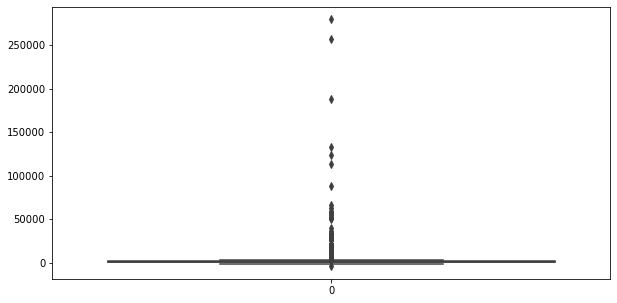

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[x[0]])

<AxesSubplot:>

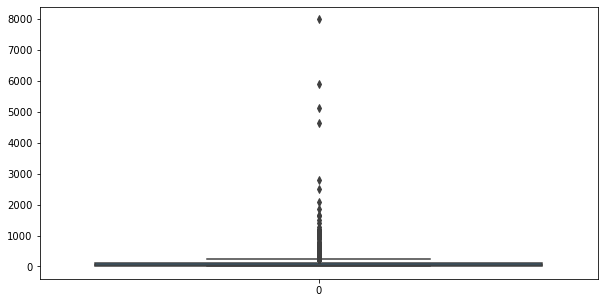

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[x[1]])

<AxesSubplot:>

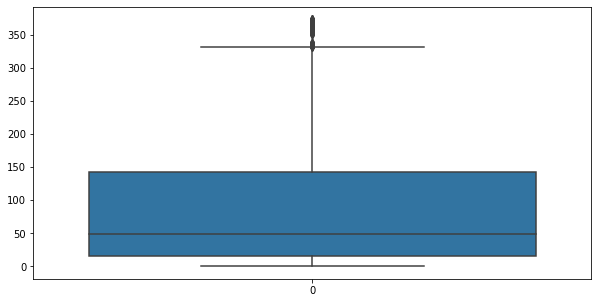

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[x[2]])

In [51]:
rfm

,CustomerID,Monetory,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


In [52]:
Q1 = rfm.Monetory.quantile(0.25)
Q3 = rfm.Monetory.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetory >= Q1-1.5*IQR) & (rfm.Monetory <= Q3+1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1-1.5*IQR) & (rfm.Frequency <= Q3+1.5*IQR)]

Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1-1.5*IQR) & (rfm.Recency <= Q3+1.5*IQR)]

In [53]:
rfm

,CustomerID,Monetory,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [54]:
rfm.describe()

,Monetory,Frequency,Recency
count,3697.000000,3697.000000,3697.000000
mean,771.363098,46.658101,103.272383
std,740.646223,41.705211,103.798588
min,-1592.490000,1.000000,0.000000
25%,248.100000,15.000000,22.000000
50%,508.460000,32.000000,60.000000
75%,1046.560000,68.000000,169.000000
max,3563.850000,178.000000,373.000000


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
rfm[x]

,Monetory,Frequency,Recency
0,0.00,2,325
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,1545.41,95,35
...,...,...,...
4366,173.90,9,73
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7


In [58]:
rfm_scaled = scaler.fit_transform(rfm[x])

In [59]:
rfm_scaled

array([[-1.04161396, -1.07094871,  2.13642223],
       [ 1.38529792, -0.3754979 , -0.28204953],
       [ 1.33170234,  0.63170672, -0.82162889],
       ...,
       [-0.93247827, -0.9510434 ,  0.73929711],
       [-0.80314128, -0.80715703, -0.92761769],
       [ 1.43936613,  0.55976353, -0.59038059]])

In [60]:
rfm_scaled = pd.DataFrame(rfm_scaled)

In [61]:
rfm_scaled

,0,1,2
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828
...,...,...,...
3692,-0.806787,-0.903081,-0.291685
3693,-0.797740,-0.879100,1.673926
3694,-0.932478,-0.951043,0.739297
3695,-0.803141,-0.807157,-0.927618


In [62]:
x

['Monetory', 'Frequency', 'Recency']

In [63]:
rfm_scaled.columns = x

In [64]:
rfm_scaled

,Monetory,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828
...,...,...,...
3692,-0.806787,-0.903081,-0.291685
3693,-0.797740,-0.879100,1.673926
3694,-0.932478,-0.951043,0.739297
3695,-0.803141,-0.807157,-0.927618


In [65]:
from sklearn.cluster import KMeans

In [66]:
ssd=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(rfm_scaled)
  ssd.append(kmeans.inertia_)

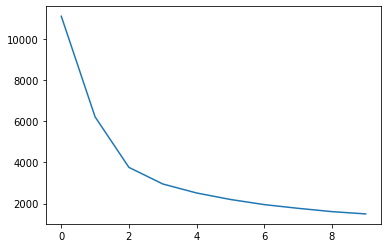

In [67]:
plt.plot(ssd)

In [68]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3)

In [69]:
kmeans.labels_

array([0, 1, 2, ..., 0, 1, 2])

In [70]:
rfm['ClusterID'] = kmeans.labels_

In [71]:
rfm

,CustomerID,Monetory,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0
5,12352.0,1545.41,95,35,2
...,...,...,...,...,...
4366,18278.0,173.90,9,73,1
4367,18280.0,180.60,10,277,0
4368,18281.0,80.82,7,180,0
4369,18282.0,176.60,13,7,1


<AxesSubplot:xlabel='ClusterID', ylabel='Monetory'>

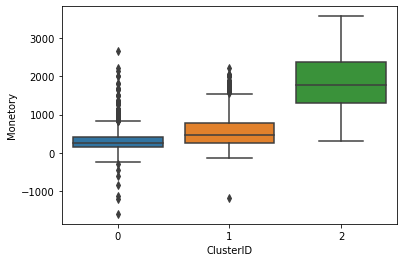

In [72]:
sns.boxplot(x='ClusterID',y='Monetory',data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

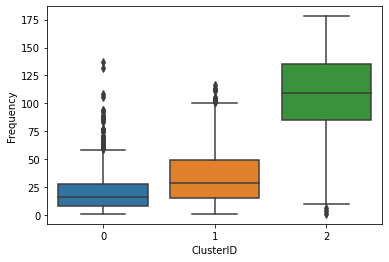

In [73]:
sns.boxplot(x='ClusterID',y='Frequency',data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

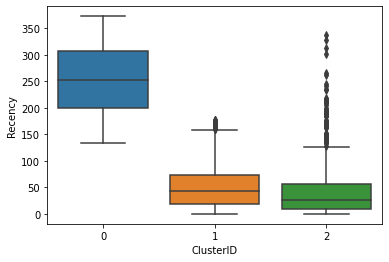

In [74]:
sns.boxplot(x='ClusterID',y='Recency',data=rfm)

In [79]:
#6. What output will the below code give:


colour=['red','blue','green','yellow','cyan']
n=0
for i in range(0,len(colour)):
    plt.scatter(x[df['Clusters(5)']==i],y[df['Clusters(5)']==i],s=10,c=colour[i])
    plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], color='black')

NameError: name 'X' is not defined